In [66]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression




In [67]:
#Loading Dataset
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


**Data Preprocessing**

In [68]:
x = df.iloc[:,:-1].values
y = df.iloc[:,4].values

In [69]:
#Checking for unique values in day column 
df['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [70]:
#Checking for unique values in time column 
df['time'].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [71]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [72]:
df.info

<bound method DataFrame.info of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>

In [73]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [74]:
df.isnull()

,total_bill,tip,sex,smoker,day,time,size
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
239,False,False,False,False,False,False,False
240,False,False,False,False,False,False,False
241,False,False,False,False,False,False,False
242,False,False,False,False,False,False,False


In [75]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

No null values in the dataset


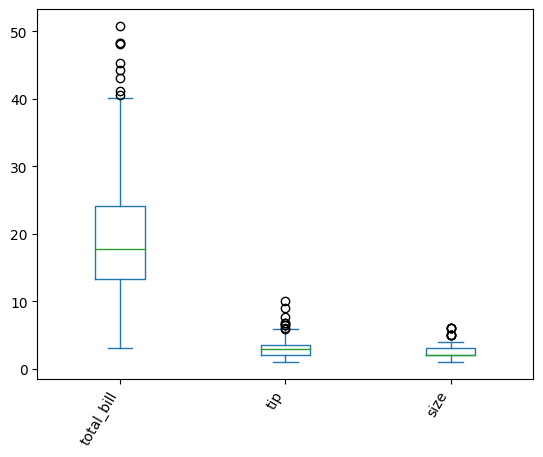

In [76]:
#Checking for outlier
df.plot.box()
plt.xticks(rotation=60, ha='right');

*Mapping Categorical Values*

In [77]:
#le = LabelEncoder()
#df['sex'] = le.fit_transform(df['sex'])
#df['smoker'] = le.fit_transform(df['smoker'])
#df['day'] = le.fit_transform(df['day'])
#df['time'] = le.fit_transform(df['time'])

#df.head()

In [78]:
sex_mapping = {'Male': 0, 'Female': 1}
df['sex'] = df['sex'].map(sex_mapping)
print(sex_mapping)

{'Male': 0, 'Female': 1}


In [79]:
smoker_mapping = {'Yes': 0, 'No': 1}
df['smoker'] = df['smoker'].map(smoker_mapping)
print(smoker_mapping)

{'Yes': 0, 'No': 1}


In [80]:
day_mapping = {'Thur': 0, 'Fri': 1, 'Sat':2, 'Sun':3}
df['day'] = df['day'].map(day_mapping)
print(day_mapping)

{'Thur': 0, 'Fri': 1, 'Sat': 2, 'Sun': 3}


In [81]:
time_mapping = {'Dinner': 0, 'Lunch': 1}
df['time'] = df['time'].map(time_mapping)
print(time_mapping)

{'Dinner': 0, 'Lunch': 1}


In [82]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,1,3,0,2
1,10.34,1.66,0,1,3,0,3
2,21.01,3.50,0,1,3,0,3
3,23.68,3.31,0,1,3,0,2
4,24.59,3.61,1,1,3,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,0,1,2,0,3
240,27.18,2.00,1,0,2,0,2
241,22.67,2.00,0,0,2,0,2
242,17.82,1.75,0,1,2,0,2


*Normalization*

In [83]:
#Checking for Normalization
df['smoker'].value_counts(normalize=True)

smoker
1    0.618852
0    0.381148
Name: proportion, dtype: float64

In [84]:
df['sex'].value_counts(normalize=True)

sex
0    0.643443
1    0.356557
Name: proportion, dtype: float64

In [85]:
df['day'].value_counts(normalize=True)

day
2    0.356557
3    0.311475
0    0.254098
1    0.077869
Name: proportion, dtype: float64

In [86]:
df['time'].value_counts(normalize=True)

time
0    0.721311
1    0.278689
Name: proportion, dtype: float64

In [87]:
# Convert categorical variables to numerical using one-hot encoding
data_encoded = pd.get_dummies(df, drop_first=True)

In [88]:
# Select features and target variable
X = data_encoded.drop('sex', axis=1)  # Drop the target variable from features
y = data_encoded['sex']  # Target variable

**Visualization**

<Axes: >

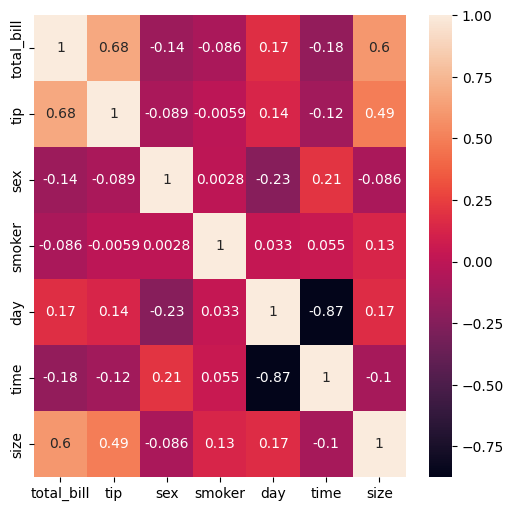

In [89]:
# Explore correlations between features
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(df.corr(), annot=True, ax=ax)

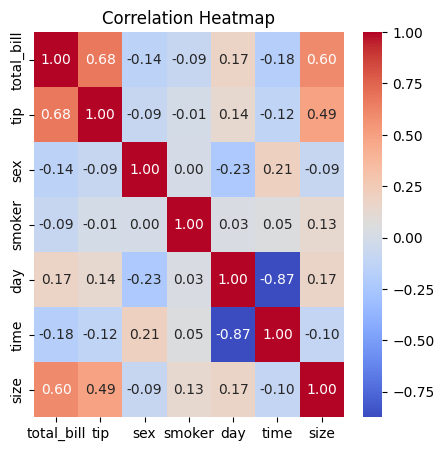

In [90]:
plt.figure(figsize=(5, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='total_bill', ylabel='smoker'>

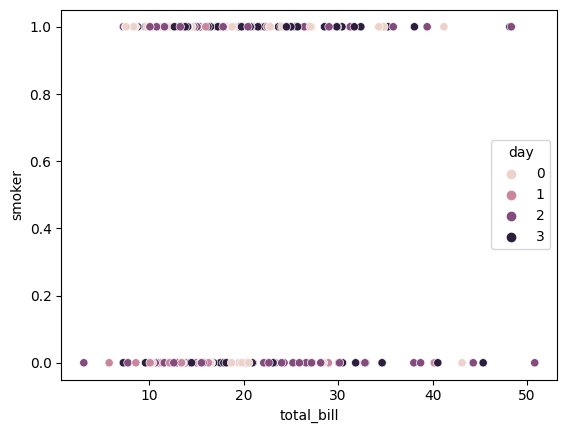

In [91]:
sns.scatterplot(data=df, x='total_bill', y='smoker', hue='day')

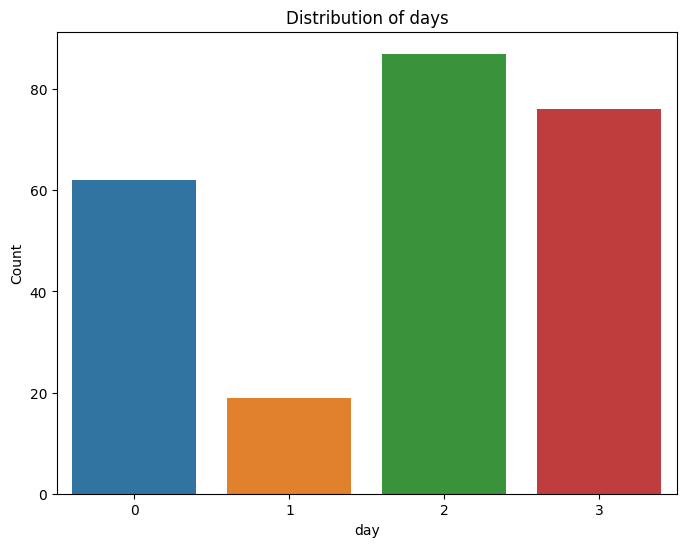

In [92]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='day', data=df)
plt.title('Distribution of days')
plt.xlabel('day')
plt.ylabel('Count')
plt.show()

In [93]:
# Split features (X) and target variable (y)
X_train = df.drop('day', axis=1)
y_train = df['day']

In [94]:
# Avoiding the dummy variable trap
x = x[:,1:]

In [95]:
y = df['day']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


**Model Building**

In [96]:
# Fitting multiple linear regression to the trining set
model = LinearRegression()

In [97]:
model.fit(x_train, y_train)

ValueError: could not convert string to float: 'Male'